In [1]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [2]:
# load the stock news data
stock_df = pd.read_csv("stock_sentiment.csv")

In [3]:
# 1 - Positive Sentiment
# 2 - Negetive Sentiment
stock_df.head()

Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1

In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [5]:
# check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [6]:
stock_df['Sentiment'].unique()

array([1, 0], dtype=int64)

In [7]:
stock_df['Text'].nunique()

5791

In [8]:
fig = px.bar(stock_df['Sentiment'].value_counts(), title='Counts of diffent sentiments')
fig.show()

# PERFORMING DATA CLEANING

### 1. REMOVING PUNCTUATIONS FROM TEXT

In [9]:
import string
string.punctuation
# These are all the characters we want to remove

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [11]:
# Let's remove punctuations from our dataset 
stock_df['New_Text'] = stock_df['Text'].apply(remove_punc)

In [12]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                                               New_Text  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

### 2. REMOVING STOP WORDS FROM TEXT

In [13]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')
# These are the words that do not contribute to any sentiment

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year','https'])

In [15]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result

In [16]:
# apply pre-processing to the text column
stock_df['New_Text'] = stock_df['New_Text'].apply(preprocess)

In [17]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                                               New_Text  
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...  
1     [movie, return, feageed, indicator, trades, aw...  
2     [afraid, short, amzn, looking, like, nearmonop...  
3                                                [mnta]  
4                                                    []  
...                                                 ...  
5786  [industry, body, cii, said, discoms, likely, s...  
5787  [gold, prices, slip, investors, book, profits,...  
5788  [workers, bajaj, auto, agreed, wage, cut, peri...  
5789  [sharemarket, live, sensex, high, points, nift...  
5790  [sensex, nifty, climb, days, highs, still, key...  

[5791 rows x 3 columns]

In [18]:
# Lets compare one of the samples -
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [19]:
stock_df['New_Text'][0]
# We have a much cleaner dataset now

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [20]:
# join the words into a string
stock_df['New_Text'] = stock_df['New_Text'].apply(lambda x: " ".join(x))

In [21]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                                               New_Text  
0     kickers watchlist xide tit soq pnk cpw bpz tra...  
1         movie return feageed indicator trades awesome  
2     afraid short amzn looking like nearmonopoly eb...  
3                                                  mnta  
4                                                        
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip investors book profits amid c...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb days highs still key factor...  

[5791 rows x 3 columns]

# PLOTTING WORDCLOUD

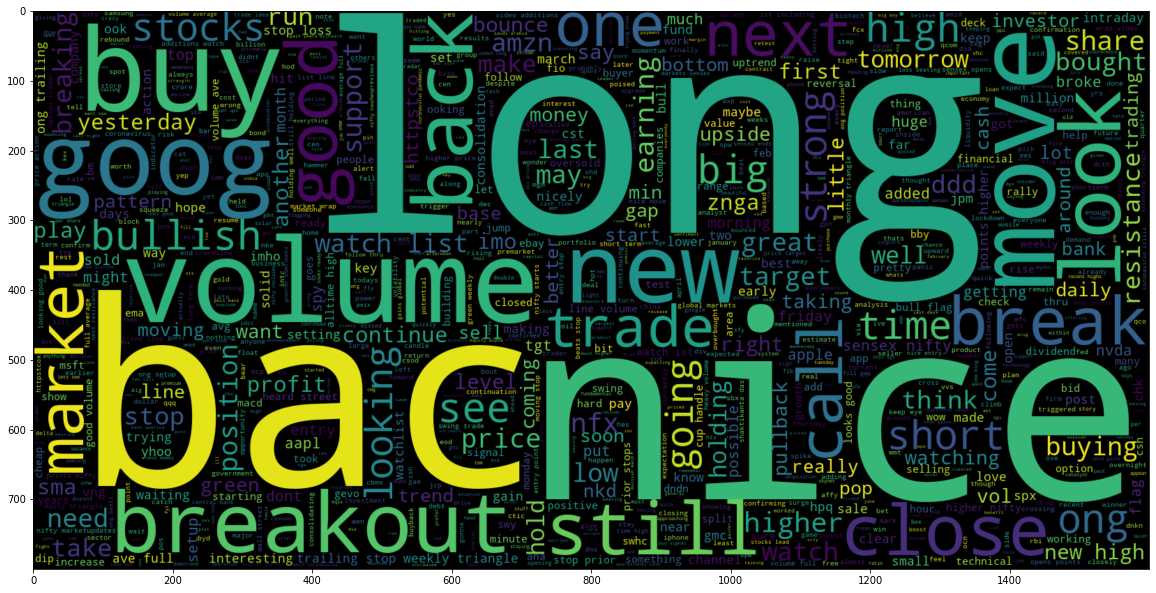

In [22]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['New_Text']))
plt.imshow(wc, interpolation = 'bilinear');

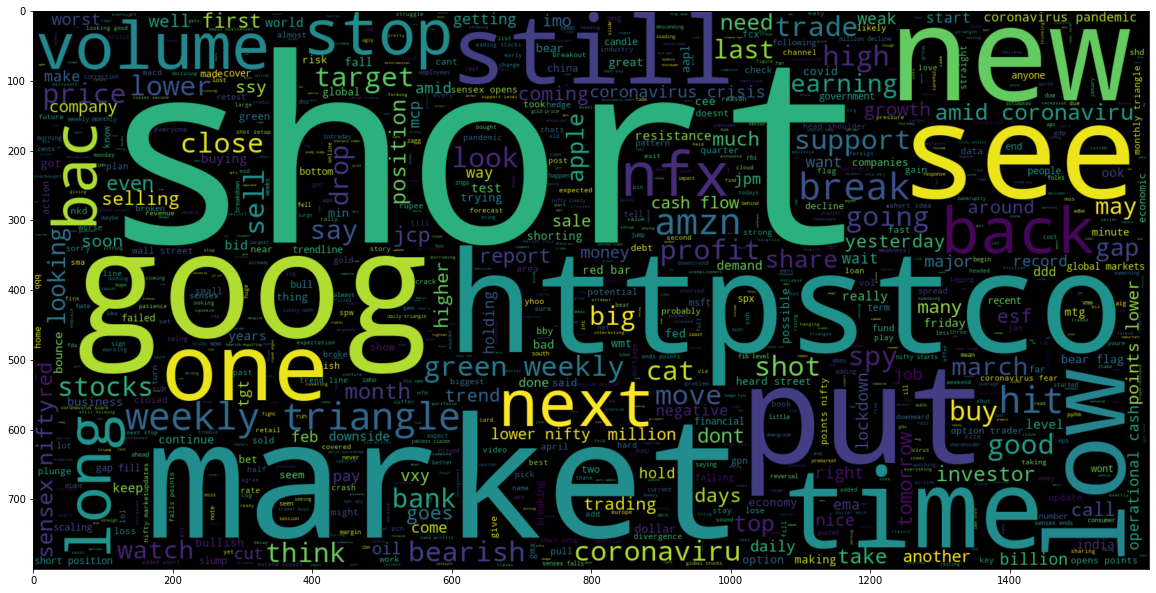

In [23]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['New_Text']))
plt.imshow(wc, interpolation = 'bilinear');

# VISUALISING THE CLEANED DATASET

In [24]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for words in stock_df['New_Text']:
    tokens = words.split()
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 20


In [25]:
tweets_length = [ len(x.split()) for x in stock_df['New_Text'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 7,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

In [26]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

# PREPARING THE DATA BY TOKENIZING AND PADDING

In [27]:
# Obtain the total words present in the dataset
list_of_words = []
for i in stock_df['New_Text']:
    word = ''
    for j in i:
        if j==' ':
            list_of_words.append(word)
            word = ''
        else:
            word += j

In [28]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'watch',
 'tomorrow',
 'ong',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'cheap',
 'great',
 'maykiljil',
 'posted',
 'agree',
 'msft',
 'going',
 'higher',
 'possibly',
 'momentum',
 'coming'

In [29]:
list_of_words = list(set(list_of_words))

In [30]:
list_of_words

['finviz',
 'sqftcondo',
 'stellar',
 'dec',
 'ripples',
 'ties',
 'halol',
 'submitted',
 'continuing',
 'zcs',
 'rockets',
 'tpx',
 'appliances',
 'reboot',
 'glynnâ',
 'continued',
 'email',
 'paint',
 'thanks',
 'critic',
 'knockout',
 'cure',
 'taiwanese',
 'prepare',
 'profitsboy',
 'led',
 'looks',
 'extent',
 'repeat',
 'httpstcomrz',
 'trapped',
 'consumption',
 'underpriced',
 'education',
 'wac',
 'ltratech',
 'moneymarket',
 'mexicoâ',
 'httpstcoeccry',
 'whoop',
 'rolling',
 'handle',
 'damage',
 'oupss',
 'seven',
 'site',
 'suggested',
 'starts',
 'something',
 'carrying',
 'remarkable',
 'armour',
 'fascinating',
 'httpstcorcpvd',
 'programs',
 'salary',
 'bleeds',
 'career',
 'sfd',
 'ther',
 'pacb',
 'weak',
 'strats',
 'simple',
 'competitive',
 'highquality',
 'gaming',
 'banks',
 'boston',
 'blk',
 'rough',
 'wellestablished',
 'tts',
 'ddaif',
 'body',
 'blow',
 'asgn',
 'lose',
 'itunes',
 'staying',
 'waitressing',
 'enjoy',
 'covid',
 'orange',
 'olling',
 'boy

In [31]:
total_words = len(list_of_words)
total_words

8154

In [32]:
# split the data into test and train 
X = stock_df['New_Text']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [33]:
X_train.shape

(4632,)

In [34]:
X_test.shape

(1159,)

In [35]:
# Encoding the text to numbers to apply LSTM Neural Network later
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(list_of_words)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [36]:
train_sequences

[[332, 6168, 1461, 4959, 7196, 7985, 7776, 1735, 119, 646, 5219, 1321],
 [640, 738, 903, 4696, 5298, 338],
 [27, 6440, 7766, 328, 4487, 6373, 5924, 5037, 919, 480],
 [640, 738, 903, 2246, 6293, 4326],
 [801, 7139, 6694, 1707, 4479, 1348, 3133, 5381],
 [5443, 3267, 7328, 6103, 4087],
 [4947, 1743, 6982, 7242, 3194, 369, 6283, 4537, 3114, 2719],
 [3894, 1132, 3515, 7766, 7032, 6580],
 [1781, 1354, 3867, 1259, 6376, 1461, 7196, 1387],
 [1397, 3487, 1013, 7290, 2368, 5137, 3823, 1904],
 [1055, 4326],
 [1226, 4326],
 [3603, 7161, 3811, 7766, 2419, 6845, 3662, 2746, 429],
 [7426, 4828, 4998, 3521, 5225],
 [3362,
  3109,
  1192,
  4930,
  4316,
  5391,
  369,
  5769,
  3449,
  1348,
  4103,
  5986,
  4326,
  5403],
 [3550, 3831, 6293, 280, 6599, 3734, 1105, 552, 7654, 7684, 5321, 4683],
 [6269,
  2451,
  4997,
  3984,
  3519,
  1165,
  4581,
  1239,
  6355,
  2367,
  6293,
  7073,
  2997,
  734],
 [7669, 4622, 1827, 1984, 5453, 4326, 2392, 1394, 2609],
 [635, 3242, 5606, 3455, 2419, 1348, 201

In [37]:
test_sequences

[[5975, 999, 5198, 6253, 5455, 6637, 7421, 7684, 6253, 8047],
 [7005, 4112, 660, 3152, 4360, 1062],
 [5975, 1666, 2684, 2418, 7740, 3143],
 [4342, 7089, 5564, 1943, 5554, 6305, 3596, 7623, 852],
 [8146, 4909, 2777, 5962, 6716, 5831, 3727],
 [3603, 880, 3811, 7032, 5032, 567, 1348, 6301, 2782],
 [328, 7685, 7094, 801, 7175, 3918, 6441, 8019, 6770, 3410],
 [4326, 353, 3536, 2217, 5686, 4326],
 [6668, 3902, 4938, 698, 5432, 7342, 7236, 1225, 5478, 2228, 4871, 2451, 3143],
 [4326, 4909, 2777, 7035, 4846, 5831, 3727],
 [5712, 4754, 640, 370, 7729, 6584, 1894, 5831, 4754, 7032],
 [6103, 5976, 19, 5966, 5443, 1611, 80, 3487, 4403, 3810, 640, 3801, 2011],
 [2824, 3028, 838, 442, 1105, 4433, 5712, 5339, 4629],
 [4270, 6616, 7877, 126, 4698, 7412, 1108, 7600, 931, 883, 6476, 2827, 3098],
 [7171,
  6102,
  6873,
  5037,
  2427,
  5897,
  5770,
  6956,
  3542,
  4603,
  777,
  5925,
  5966,
  2721],
 [6097, 5831, 4779],
 [4723, 4501, 6819, 5895, 2597, 6652, 4834, 4629],
 [1425, 831, 1785, 3488, 82

In [38]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 1193    green weekly triangle fnfgpdating check blog
Name: New_Text, dtype: object 
 is:  [640, 738, 903, 4696, 5298, 338]


In [39]:
# Add padding to training and testing so that all sequences are of same lengths
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

In [40]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [ 332 6168 1461 4959 7196 7985 7776 1735  119  646 5219 1321    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [ 640  738  903 4696 5298  338    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [  27 6440 7766  328 4487 6373 5924 5037  919  480    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [41]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [42]:
y_train_cat
# 0 1 - Positive Sentiment
# 1 0 - Negetive Sentiment

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# BUILDING A DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

In [43]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4174848   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 4,995,458
Trainable params: 4,995,458
Non-trainable params: 0
_________________________________________________________________


In [52]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 50)

Epoch 1/50
116/116 [==============================] - 7s 60ms/step - loss: 0.5119 - acc: 0.7838 - val_loss: 0.5952 - val_acc: 0.6764
Epoch 2/50
116/116 [==============================] - 8s 67ms/step - loss: 0.4784 - acc: 0.8105 - val_loss: 0.6105 - val_acc: 0.7044
Epoch 3/50
116/116 [==============================] - 8s 72ms/step - loss: 0.4494 - acc: 0.8313 - val_loss: 0.6085 - val_acc: 0.7195
Epoch 4/50
116/116 [==============================] - 8s 71ms/step - loss: 0.4442 - acc: 0.8364 - val_loss: 0.5839 - val_acc: 0.7044
Epoch 5/50
116/116 [==============================] - 7s 60ms/step - loss: 0.4005 - acc: 0.8529 - val_loss: 0.6029 - val_acc: 0.7443
Epoch 6/50
116/116 [==============================] - 7s 60ms/step - loss: 0.3214 - acc: 0.8821 - val_loss: 0.6365 - val_acc: 0.7508
Epoch 7/50
116/116 [==============================] - 8s 69ms/step - loss: 0.2472 - acc: 0.9069 - val_loss: 0.7096 - val_acc: 0.7519
Epoch 8/50
116/116 [==============================] - 7s 63ms/step - 

# ASSESSING TRAINED MODEL PERFORMANCE

In [53]:
# make prediction
pred = model.predict(padded_test)

In [54]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [47]:
prediction

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [55]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [49]:
original

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [56]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7109577221742882

<AxesSubplot:>

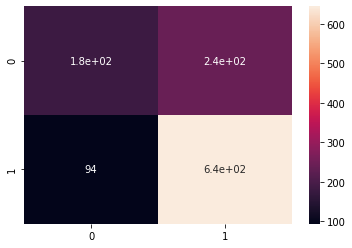

In [57]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)